#**Introduction to Data Science --1001-21fall**
#**Data Analysis Project 3**

NETID: qy692

Applying machine learning methods to movie ratings data

#Question 1:
Apply dimension reduction methods – specifically a PCA – to the data in columns 421-474. As laid out above, these columns contain self-report answers to personality and how these individuals experience movies, respectively. It is us to you whether you do one PCA each for personality and movie experience, or one overall, but regardless of that, we would like you to:



a) Determine the number of factors (principal components) that you will interpret meaningfully (by a criterion of your choice – but make sure to name that criterion). Include a Scree plot in your answer. 

In [111]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
#Load data & Deal with missing values
data = pd.read_csv("project3.csv")
data = data.fillna(data.mean())

In [4]:
#Step 1: Standardization
df = StandardScaler().fit_transform(data.values)

In [5]:
#Step 2: Covariance Matrix Computation
mat = np.cov(df,rowvar=False)

In [6]:
#Step 3: Compute the Eigenvectors and Eigenvalues of the Covariance Matrix to Identify the Principal Components

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.

In [7]:
w,v = LA.eig(mat)

In [8]:
#Step 4: Determine the Number of Principal Components

In [9]:
#Method 1: Keep the vectors from v that could explain 95% of variance manually
#Method 2:
pca = PCA(n_components = 54)#95% of variance
pca.fit(df)
reduced = pca.transform(df)

**Note:** According to the figure above, the intersection of red line and blue dot line is (46, 0.95). Thus, the number of principal components that could explain 95% of variance should be 46.

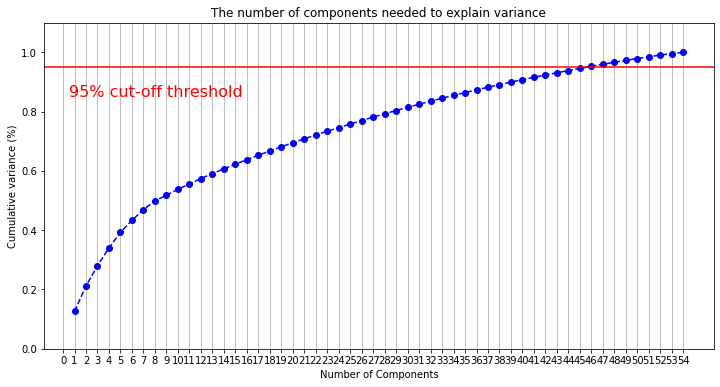

In [10]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 55, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 55, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

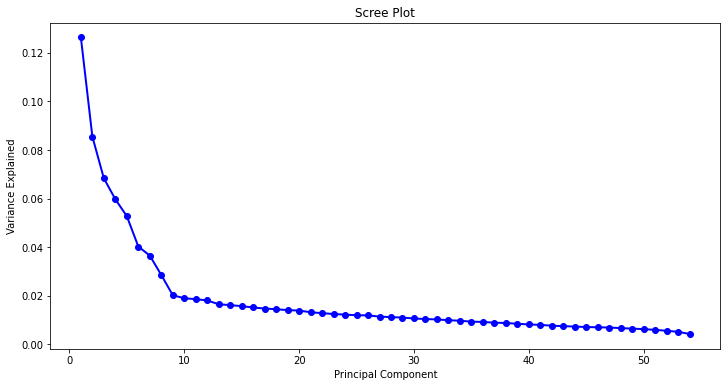

In [11]:
#Scree plot
PC_values = np.arange(pca.n_components)+1
plt.plot(PC_values,pca.explained_variance_ratio_,"o-",linewidth=2, color='blue')
plt.title("Scree Plot")
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

b) Semantically interpret what those factors represent (hint: Inspect the loadings matrix). Explicitly 
name the factors you found and decided to interpret meaningfully in 1a). Be creative.

In [12]:
#Perform PCA
pca = PCA(n_components=46)
pca_fit = pca.fit(df)

In [13]:
#Loading matrix
loadings = pd.DataFrame(pca.components_.T, columns=['PC'+str(n) for n in range(1,47)], index=data.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46
Is talkative,-0.179161,-0.098093,0.292273,-0.071001,-0.042210,-0.085080,0.135452,-0.032812,-0.069297,0.069733,0.133899,-0.001683,-0.020066,-0.049026,-0.025291,0.003443,0.063201,0.078643,-0.060945,-0.017962,-0.090693,0.026314,0.022858,-0.044764,-0.038852,0.116698,-0.004218,-0.033471,0.039789,0.153258,-0.076517,-0.184048,0.008363,0.151594,-0.189397,0.061302,-0.034211,0.099096,0.171384,0.322886,-0.116798,0.192506,0.094184,0.114502,0.085086,-0.129209
Tends to find fault with others,0.104339,-0.075464,0.072766,-0.223732,0.128650,-0.058502,-0.019312,-0.025020,-0.071930,0.153719,0.197293,-0.277506,-0.070330,0.159999,0.157605,-0.308318,0.433217,0.151860,-0.165620,0.106482,-0.141352,0.007688,-0.103982,-0.307434,0.117474,-0.061858,-0.119505,-0.081891,0.060186,-0.008063,0.109050,0.122926,0.088860,0.136186,0.127513,0.047024,0.017951,0.018410,-0.067559,-0.012879,-0.000004,-0.018115,-0.100645,-0.169332,-0.069345,0.141372
Does a thorough job,-0.185440,-0.042611,-0.151785,-0.252481,-0.083241,-0.018693,-0.058794,0.027375,0.004096,0.104160,-0.047352,-0.109978,-0.098275,-0.035827,-0.116081,0.023680,-0.069595,0.045278,-0.110725,0.042951,-0.039077,-0.008730,0.020036,-0.094817,-0.100967,0.132171,0.081043,-0.293924,-0.045913,0.233586,0.068827,-0.239890,-0.292064,-0.029327,0.198116,0.017811,0.072017,0.139710,0.131578,-0.247722,0.054394,0.019838,-0.131588,0.182631,0.079802,-0.044681
Is depressed/Blue,0.186840,-0.186085,-0.085885,-0.077156,0.062397,0.066674,0.056065,0.084655,0.056994,-0.134066,-0.077501,0.127554,-0.173237,-0.045014,0.257514,0.035128,0.076973,-0.026349,-0.210872,0.111634,-0.025959,-0.140731,0.268130,-0.107492,0.055879,0.115049,0.034010,-0.230261,-0.224159,0.010199,0.125974,0.036953,0.286057,-0.073087,-0.228913,0.022173,-0.178748,-0.018715,0.066837,-0.051213,0.061544,-0.115054,0.165306,0.103598,0.107160,-0.120085
Is original/comes up with new ideas,-0.171622,-0.130189,-0.048967,0.024789,0.239776,0.065288,-0.021782,0.213398,0.177764,0.175077,0.019366,0.108651,0.220241,0.042831,-0.005705,0.196969,-0.043116,-0.008707,-0.169572,-0.099418,0.045223,-0.003307,0.099027,-0.151871,-0.090363,0.041018,-0.240126,-0.125280,0.064544,-0.045980,-0.059011,-0.226919,-0.118325,-0.073500,0.091015,-0.000100,0.026158,-0.039675,-0.076357,0.097535,0.096843,0.206187,0.162364,-0.049939,0.036686,0.020338
Is reserved,0.145238,-0.007828,-0.339957,0.010683,0.032180,-0.148614,-0.104252,-0.023929,-0.014638,0.142170,-0.027405,-0.035705,0.025654,0.174047,-0.061455,-0.129095,-0.025605,0.009844,-0.026406,0.107442,0.048680,0.000241,0.040835,0.000278,-0.155602,0.013560,-0.134931,0.052628,-0.009200,-0.067093,0.053487,-0.120314,0.073983,0.067340,0.044652,0.067159,-0.225227,0.048743,0.053308,-0.094966,-0.145631,0.281103,-0.121090,0.002067,-0.135534,-0.130658
Is helpful and unselfish with others,-0.172146,-0.020460,-0.117732,0.111188,-0.132195,-0.140949,0.057064,-0.015524,0.095628,0.051379,-0.213740,0.202681,-0.219977,0.205653,0.046477,-0.033847,0.235246,-0.073978,-0.386388,-0.127672,0.081722,-0.022294,-0.234784,0.130249,-0.117272,0.064650,0.025048,0.238249,-0.077596,0.207259,-0.096026,0.105527,-0.068377,-0.060795,-0.202861,-0.108952,0.119031,0.016014,0.070718,-0.131843,-0.141847,0.096610,-0.052113,-0.178272,0.136356,0.083632
Can be somewhat careless,0.108963,-0.089885,0.157584,0.145167,0.163408,-0.249050,-0.039490,-0.119033,-0.048960,0.076229,-0.120299,0.109508,0.050111,-0.145617,0.040533,0.062838,0.008500,-0.088878,-0.052014,0.244327,0.097265,-0.088606,-0.366331,0.209774,0.128663,-0.115279,-0.056441,-0.138891,0.125631,-0.075063,0.172509,0.116506,-0.089579,0.104554,0.023035,-0.201985,-0.172257,0.097858,0.417820,-0.006350,0.182506,0.000255,0.007872,0.079020,-0.060752,-0.082075
Is relaxed/handles stress well,-0.163194,0.188263,0.015297,0.153106,0.120396,-0.109914

In [14]:
np.amax(loadings.iloc[:,1].values)

0.20424689232667478

**Note:** The most common name for individual elements of the eigenvectors in the statistical literature is **loading**, connoting the weight of the k_th variable x_k that is borne by the m_th eigenvector e_m through the individual element e_k,m.

**Explanation:**

In these results, first principal component has the largest positive association with "Is depressed/Blue" and largest negative association with "Is full of energy", so this component primarily measures individuals' mental state.

The second principal component has the largest negative association with "The emotions on the screen 'rub off'", and has the largest positive association with "Is emotionally stable/not easily upset", so this component primarily measures individuals' mental stability.

...

So on and so forth, the loadings close to -1 or 1 indicate that the variable strongly influences the component. Loadings close to 0 indicate that the variable has a weak influence on the component. 

#Question 2:


Plot the data from columns 421-474 in the new coordinate system, where each dot represents a 
person, and the axes represent the factors you found in 1). Hint: If you identified more than 2 
meaningful factors, it is a good idea to create several 2D (X vs. Y) subplots for better interpretability.

In [15]:
#reduced data 
reduced = pca.transform(df)

In [16]:
reduced

array([[ 1.92650126,  0.31538835, -2.18305504, ...,  0.84179873,
         0.46674929, -0.36914858],
       [ 1.69628715,  1.12057106, -2.3848009 , ...,  0.05929382,
        -0.17094646,  0.7998526 ],
       [ 0.06608619, -1.22177127,  0.83493422, ...,  0.37237374,
         0.52871725,  0.13308952],
       ...,
       [-2.58436764, -1.50252486, -3.07230447, ...,  0.17365681,
        -0.23593814, -0.09338489],
       [-0.80786412, -1.98655905, -1.91022311, ..., -0.778172  ,
         1.35341565, -1.07559352],
       [-5.02106875, -0.834704  ,  0.59883108, ..., -0.30040701,
        -0.58260988,  0.74275777]])

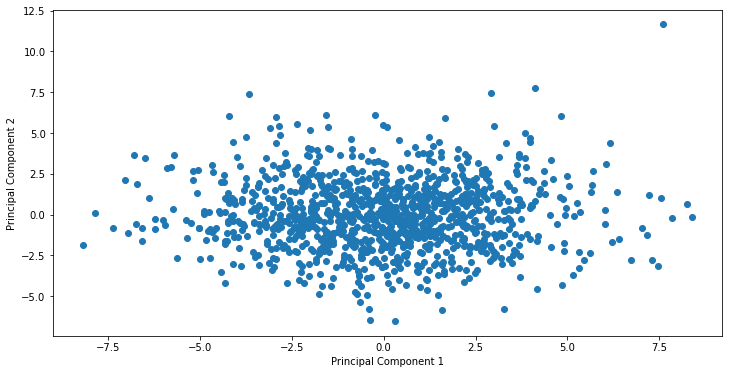

In [17]:
plt.scatter(reduced[:,0],reduced[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

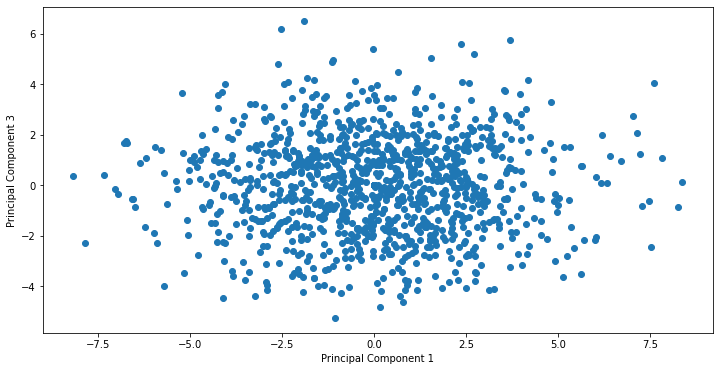

In [18]:
plt.scatter(reduced[:,0],reduced[:,2])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.show()

#Question 3:


Identify clusters in this new space. Use a method of your choice (e.g. kMeans, DBScan, hierarchical 
clustering) to do so. Determine the optimal number of clusters and identify which cluster a given user 
is part of.

In [19]:
#Use silhouette method to find the best number of clusters
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for i in range(2,30):
    km = KMeans(n_clusters=i)
    #
    # Fit the KMeans model
    #
    km.fit_predict(reduced)
    #
    # Calculate Silhoutte Score
    #
    score = silhouette_score(reduced, km.labels_, metric='euclidean')
    #
    # Print the score
    #
    print(i,': Silhouetter Score: %.3f' % score)

2 : Silhouetter Score: 0.076
3 : Silhouetter Score: 0.059
4 : Silhouetter Score: 0.051
5 : Silhouetter Score: 0.046
6 : Silhouetter Score: 0.045
7 : Silhouetter Score: 0.038
8 : Silhouetter Score: 0.039
9 : Silhouetter Score: 0.038
10 : Silhouetter Score: 0.033
11 : Silhouetter Score: 0.033
12 : Silhouetter Score: 0.033
13 : Silhouetter Score: 0.028
14 : Silhouetter Score: 0.027
15 : Silhouetter Score: 0.031
16 : Silhouetter Score: 0.015
17 : Silhouetter Score: 0.031
18 : Silhouetter Score: 0.027
19 : Silhouetter Score: 0.023
20 : Silhouetter Score: 0.010
21 : Silhouetter Score: 0.019
22 : Silhouetter Score: 0.017
23 : Silhouetter Score: 0.018
24 : Silhouetter Score: 0.018
25 : Silhouetter Score: 0.015
26 : Silhouetter Score: 0.018
27 : Silhouetter Score: 0.016
28 : Silhouetter Score: 0.017
29 : Silhouetter Score: 0.020


**Note:** the silhouette score is the largest when there are 2 clusters.Thus the optimal number of clusters is 2.

In [20]:
#Implement KMeans & label individuals
kmeans = KMeans(n_clusters=2)
kmeans.fit(reduced)
y_kmeans = kmeans.predict(reduced)

In [122]:
y_kmeans#labels of individuals

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [21]:
#Add the labels of individuals to the reduced space
df = pd.DataFrame(reduced)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,cluster
0,1.926501,0.315388,-2.183055,1.020751,3.621376,1.084757,-4.437277,-0.726429,-2.528702,-2.279852,-0.775846,-1.438132,1.851288,3.334819,-0.657832,4.061527,-0.096265,1.464598,-1.072888,0.289820,1.992842,0.798935,0.642738,-1.129967,1.345576,0.283784,3.499721,0.376617,1.354786,-1.579071,1.113343,-1.892505,-0.359245,-1.092148,-0.312508,0.095841,-0.289097,-0.656295,-0.301890,0.302091,-0.744977,-0.891967,-0.635310,0.841799,0.466749,-0.369149,0
1,1.696287,1.120571,-2.384801,1.363424,0.631459,-0.009544,-0.948419,-2.254721,-2.264637,0.928609,-0.630472,0.221593,2.272306,0.044247,-1.157954,-0.403721,0.109009,-1.439290,0.295668,-1.446419,-0.600581,0.299672,-0.969776,-0.157519,-0.097174,0.180648,0.671029,-1.106765,0.249429,-0.564085,-0.614319,0.162903,-0.826245,1.545427,0.242931,1.743932,-1.039637,0.109933,-0.339611,-0.561755,0.952497,-0.093950,0.098935,0.059294,-0.170946,0.799853,0
2,0.066086,-1.221771,0.834934,1.539120,-1.112903,0.385308,0.101757,-1.123157,0.048835,0.761108,0.138954,-0.268392,-1.935093,-0.603816,-1.352466,0.843488,-1.747296,-0.298758,0.134262,-0.195344,-0.886828,0.533766,-1.575518,-0.222400,0.299718,-0.143033,0.668766,-0.386977,0.061068,-0.423199,-0.898152,-0.268778,0.454213,0.638572,-1.068530,0.484028,-0.125279,0.302706,0.063264,0.227697,0.701448,0.358700,-0.976244,0.372374,0.528717,0.133090,0
3,-2.125467,-1.772635,-1.495513,-0.525715,0.141901,1.030341,3.967130,0.467783,-0.629500,1.030163,-0.093049,-0.426539,-0.490700,-0.462727,-0.757080,-0.445741,-1.023698,-0.487242,-0.517230,-1.004213,-0.234891,0.509989,1.252368,-1.299103,-0.641139,0.043840,0.485558,-1.805859,0.330360,1.005693,-0.675667,0.128975,0.771028,-0.459523,-0.103683,0.241568,0.659737,0.437743,-0.078174,0.522410,-0.647574,-0.502892,0.520099,-0.319646,0.254144,0.679851,1
4,2.198375,-1.442189,1.824948,0.234132,-1.054852,0.140968,0.464081,-0.878360,-0.252328,1.170081,0.127903,-0.897715,-1.015348,0.103373,0.954397,0.337467,-0.684193,0.680076,-1.080746,0.042585,0.882932,-0.605736,-0.506483,0.641571,0.118352,0.375769,-1.078452,0.281998,-0.756089,1.579600,-0.000361,1.355996,0.484748,0.247798,0.547160,1.163105,-0.498741,-0.908352,0.222474,0.061827,-0.226115,-0.432067,-0.058047,-0.229604,0.023608,-0.488858,0


#Question 4:

Use these principal components and/or clusters you identified to build a classification model of your 
choice (e.g. logistic regression, kNN, SVM, random forest), where you predict the movie ratings of all 
movies from the personality factors identified before. Make sure to use cross-validation methods to 
avoid overfitting and assess the accuracy of your model by stating its AUC.

In [136]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [137]:
#load the data
#feature matrix
X = reduced.copy()#(1097,46)

In [138]:
#Label matrix (1097,400)
Y = pd.read_csv("movieratings.csv")
Y = Y.fillna(Y.mean())
Y = Y.round().astype(int)
Y.head()

#Here X is our independent/input variables
#And Y is our dependent/target variables

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),King Kong (1976),The Machinist (2004),A Nightmare on Elm Street (1984),Brazil (1985),The Fast and the Furious (2001),Change of Habit (1969),American Beauty (1999),Psycho (1960),Terminator 3: Rise of the Machines (2003),Night of the Living Dead (1968),Man on Fire (2004),Star Wars: Episode IV - A New Hope (1977),The Silence of the Lambs (1991),The Others (2001),Minority Report (2002),Sling Blade (1996),Schindler's List (1993),3000 Miles to Graceland (2001),Magnolia (1999),The Karate Kid Part II (1986),Planet of the Apes (2001),The Godfather: Part II (1974),Indiana Jones and the Temple of Doom (1984),Indiana Jones and the Raiders of the Lost Ark (1981),The Iron Giant (1999),The Matrix Revolutions (2003),North (1994),The Lost World: Jurassic Park (1997),The Texas Chainsaw Massacre (1974),Taxi Driver (1976),...,One Flew Over the Cuckoo's Nest (1975),Freddy Got Fingered (2001),The Village (2004),Miller's Crossing (1990),My Best Friend's Wedding (1997),Iron Man 3 (2013),Big Daddy (1999),Suspiria (1977),The Passenger (1975),The Station Agent (2003),Jurassic Park (1993),Captain America: Civil War (2016),A Perfect Murder (1998),Analyze That (2002),Braveheart (1995),Inception (2010),Groundhog Day (1993),The Lookout (2007),21 Grams (2003),Gladiator (2000),Midnight Cowboy (1969),Fatal Attraction (1987),House of Sand and Fog (2003),On Golden Pond (1981),The Mummy (1999),The Descent (2005),Runaway Bride (1999),Harry Potter and the Goblet of Fire (2005),Gods and Generals (2003),My Father and My Son (2005),X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2,2,4,3,3,3,2,3,2,3,2,3,2,2,4,2,3,4,2,2,3,3,3,3,3,2,3,2,3,4,2,3,4,3,3,3,2,3,0,3,...,3,2,2,2,3,3,3,2,2,2,3,3,2,2,3,3,3,2,2,3,3,3,2,2,3,2,3,0,2,2,3,3,3,4,0,2,2,2,2,2
1,2,2,2,3,3,3,2,3,2,3,2,3,2,2,3,2,3,3,2,2,3,3,3,3,3,2,3,2,3,3,2,3,3,3,3,3,2,3,2,3,...,3,2,2,2,3,3,3,2,2,2,3,3,2,2,3,2,3,2,2,3,3,3,2,2,3,2,3,3,2,2,3,3,3,3,4,2,2,2,2,2
2,2,2,3,3,3,3,2,3,2,3,2,3,2,2,2,2,3,3,2,2,3,3,3,3,3,2,3,2,3,3,2,3,3,3,3,3,2,2,2,3,...,3,2,2,2,3,3,3,2,2,2,3,3,2,2,3,4,3,2,2,3,3,3,2,2,3,2,3,4,2,2,3,3,3,3,4,2,2,2,2,2
3,2,2,2,3,3,3,2,3,2,4,2,3,2,2,3,2,4,3,2,2,3,4,3,3,3,2,3,2,3,3,2,3,2,2,3,3,2,3,2,3,...,4,2,2,2,3,2,3,2,2,2,2,0,2,2,3,4,3,2,2,3,3,4,2,2,3,2,3,2,2,2,3,3,3,3,2,2,2,2,2,2
4,2,2,4,3,0,3,0,1,2,0,0,3,2,2,2,2,3,3,2,2,3,3,3,3,1,4,3,2,3,3,1,3,0,3,3,3,2,3,2,3,...,3,2,2,2,4,2,2,2,2,2,3,4,2,2,3,4,2,2,2,3,3,3,2,2,1,2,4,3,2,2,2,3,3,3,3,2,2,2,2,2


In [139]:
scores = []#build a list to store the model scores
aucs = []#build a list to store the AUC scores
Y_predict = []
for i in range(400):
  #ratings for ith movie
  y = Y.iloc[:,i].values
  
  #Create Test and Train Dataset
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state = 1)

  lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
  lm.fit(X_train, y_train)

  Y_predict.append(lm.predict(X_test))

  scores.append(lm.score(X_test,y_test))
  try:
    aucs.append(roc_auc_score(y_test, lm.predict_proba(X_test), multi_class='ovr'))
  except ValueError:
    pass
  

In [141]:
#predicted results
Y_predict = pd.DataFrame(Y_predict)
Y_predict

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219
0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,3,4,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,2,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
396,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
397,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
398,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [142]:
aucs = pd.DataFrame(aucs)
aucs#AUC scores

,0
0,0.622661
1,0.665490
2,0.655389
3,0.604663
4,0.595883
...,...
355,0.544948
356,0.586688
357,0.647815
358,0.497871


In [72]:
#scores

#**Supplement material - Build Logistic Regression Model**

**Multiclass Logistic Regression Using Sklearn:**
https://www.kaggle.com/satishgunjal/multiclass-logistic-regression-using-sklearn.

**Step 1:** Create Test and Train Dataset

*   We will split the dataset, so that we can use one set of data for training the model and one set of data for testing the model
*   We will keep 20% of data for testing and 80% of data for training the model


In [37]:
# y = Y.iloc[:,10].values

In [62]:
# #Create Test and Train Dataset
# X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state = 1)
# print('X_train dimension= ', X_train.shape)
# print('X_test dimension= ', X_test.shape)
# print('y_train dimension= ', y_train.shape)
# print('y_train dimension= ', y_test.shape)

**Step 2:** Multi Class Logistic Regression Using OVR


*   Since we are going to use One Vs Rest algorithm, set > multi_class='ovr'

*   Note: since we are using One Vs Rest algorithm we must use 'liblinear' solver with it.



In [63]:
# lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
# lm.fit(X_train, y_train)

**Step 3:**Testing the Model


*   For testing we are going to use the test data only
*   Predict the target value/ratings from test data



In [64]:
# lm.predict(X_test)#predicted value 

In [65]:
# y_test#actual value from test data

In [66]:
# lm.predict_proba(X_test)

**Step 4:** Check the model score using test data

In [67]:
# lm.score(X_test,y_test)

**Step 5:** Confusion Matrix


*   Confusion matrix helps to visualize the performance of the model
*   The diagonal elements represent the number of points for which the predicted label is equal to the true label
*   Off-diagonal elements are those that are mislabeled by the classifier.
*   The higher the diagonal values of the confusion matrix the better, indicating many correct


In [68]:
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.set_title('Confusion Matrx')

# disp =metrics.plot_confusion_matrix(lm, X_test, y_test, ax = ax)
# disp.confusion_matrix

**Step 6:** Classification Report

Classification report is used to measure the quality of prediction from classification algorithm

*   Precision: Indicates how many classes are correctly classified
*   Recall: Indicates what proportions of actual positives was identified correctly
*   F-Score: It is the harmonic mean between precision & recall
*   Support: It is the number of occurrence of the given class in our dataset


In [84]:
# print(metrics.classification_report(y_test, lm.predict(X_test)))

#Question 5:


Create a neural network model of your choice to predict movie ratings, using information from all 477 
columns. Make sure to comment on the accuracy of this model. 

**Multilayer Perceptron:**

Multilayer Perceptron (MLP) is a class of feed-forward artificial neural networks. The term perceptron particularly refers to a single neuron model that is a precursor to a larger neural network. An MLP consists of three main layers of nodes — an input layer, a hidden layer, and an output layer. In the hidden and the output layer, every node is considered as a neuron that uses a nonlinear activation function. MLP uses a supervised learning technique called backpropagation for training. When a neural network is initialised, weights are set for each neuron. Backpropagation helps in adjusting the weights of the neurons to obtain output closer to the expected.
MLPs are most ideal for projects involving tabular datasets, classification prediction problems, and regression prediction problems.

https://scikit-learn.org/stable/modules/neural_networks_supervised.html.

In [143]:
#load the data
#feature matrix
X = reduced.copy()#(1097,46)

In [144]:
#Label matrix (1097,400)
Y = pd.read_csv("movieratings.csv")
Y = Y.fillna(Y.mean())
Y = Y.round().astype(int)
Y.head()

#Here X is our independent/input variables
#And Y is our dependent/target variables

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),King Kong (1976),The Machinist (2004),A Nightmare on Elm Street (1984),Brazil (1985),The Fast and the Furious (2001),Change of Habit (1969),American Beauty (1999),Psycho (1960),Terminator 3: Rise of the Machines (2003),Night of the Living Dead (1968),Man on Fire (2004),Star Wars: Episode IV - A New Hope (1977),The Silence of the Lambs (1991),The Others (2001),Minority Report (2002),Sling Blade (1996),Schindler's List (1993),3000 Miles to Graceland (2001),Magnolia (1999),The Karate Kid Part II (1986),Planet of the Apes (2001),The Godfather: Part II (1974),Indiana Jones and the Temple of Doom (1984),Indiana Jones and the Raiders of the Lost Ark (1981),The Iron Giant (1999),The Matrix Revolutions (2003),North (1994),The Lost World: Jurassic Park (1997),The Texas Chainsaw Massacre (1974),Taxi Driver (1976),...,One Flew Over the Cuckoo's Nest (1975),Freddy Got Fingered (2001),The Village (2004),Miller's Crossing (1990),My Best Friend's Wedding (1997),Iron Man 3 (2013),Big Daddy (1999),Suspiria (1977),The Passenger (1975),The Station Agent (2003),Jurassic Park (1993),Captain America: Civil War (2016),A Perfect Murder (1998),Analyze That (2002),Braveheart (1995),Inception (2010),Groundhog Day (1993),The Lookout (2007),21 Grams (2003),Gladiator (2000),Midnight Cowboy (1969),Fatal Attraction (1987),House of Sand and Fog (2003),On Golden Pond (1981),The Mummy (1999),The Descent (2005),Runaway Bride (1999),Harry Potter and the Goblet of Fire (2005),Gods and Generals (2003),My Father and My Son (2005),X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2,2,4,3,3,3,2,3,2,3,2,3,2,2,4,2,3,4,2,2,3,3,3,3,3,2,3,2,3,4,2,3,4,3,3,3,2,3,0,3,...,3,2,2,2,3,3,3,2,2,2,3,3,2,2,3,3,3,2,2,3,3,3,2,2,3,2,3,0,2,2,3,3,3,4,0,2,2,2,2,2
1,2,2,2,3,3,3,2,3,2,3,2,3,2,2,3,2,3,3,2,2,3,3,3,3,3,2,3,2,3,3,2,3,3,3,3,3,2,3,2,3,...,3,2,2,2,3,3,3,2,2,2,3,3,2,2,3,2,3,2,2,3,3,3,2,2,3,2,3,3,2,2,3,3,3,3,4,2,2,2,2,2
2,2,2,3,3,3,3,2,3,2,3,2,3,2,2,2,2,3,3,2,2,3,3,3,3,3,2,3,2,3,3,2,3,3,3,3,3,2,2,2,3,...,3,2,2,2,3,3,3,2,2,2,3,3,2,2,3,4,3,2,2,3,3,3,2,2,3,2,3,4,2,2,3,3,3,3,4,2,2,2,2,2
3,2,2,2,3,3,3,2,3,2,4,2,3,2,2,3,2,4,3,2,2,3,4,3,3,3,2,3,2,3,3,2,3,2,2,3,3,2,3,2,3,...,4,2,2,2,3,2,3,2,2,2,2,0,2,2,3,4,3,2,2,3,3,4,2,2,3,2,3,2,2,2,3,3,3,3,2,2,2,2,2,2
4,2,2,4,3,0,3,0,1,2,0,0,3,2,2,2,2,3,3,2,2,3,3,3,3,1,4,3,2,3,3,1,3,0,3,3,3,2,3,2,3,...,3,2,2,2,4,2,2,2,2,2,3,4,2,2,3,4,2,2,2,3,3,3,2,2,1,2,4,3,2,2,2,3,3,3,3,2,2,2,2,2


In [145]:
#Step 1: Create training and testing data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size= 0.2, random_state = 1)

In [146]:
#Step 2: Standardization
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)  

In [129]:
scores = []#build a list to store the accuracy scores for each prediction
Y_predict = []#build a list to store 
for i in range(400):

  #Step 3: Build the MLPClassifier
  y_train = Y_train.iloc[:,i].values
  y_test = Y_test.iloc[:,i].values
  clf = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(150, 100,50), random_state=1)
  clf.fit(X_train,y_train)

  #Predict y for x_value
  y_pred = clf.predict(X_test)
  Y_predict.append(y_pred)

  #Step 4: Calculate the accuracy of predictions
  #Compare the predictions against the actual observations in y_test
  #cm = confusion_matrix(y_pred,y_test)
  #return the accuracy classification score
  scores.append(accuracy_score(y_pred,y_test))

In [133]:
Y_predict = pd.DataFrame(Y_predict)
Y_predict

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219
0,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,3,4,3,3,3,3,4,3,3,3,3,4,3,3,3,3,3,4,4,4,4,0,3,3,3,4,4,3,3,3,4,4,3,3,3,3,4,3,3,4,...,4,4,4,3,4,3,3,3,4,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,3,4,3,4,3,3,4,3,2,3,4,4,4,3,3,4
3,3,3,2,3,3,3,3,3,2,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,4,3,3,3,...,3,4,3,3,3,3,3,3,3,3,3,2,3,3,2,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,2,2,3,3,4,3,3,4,3,3,3,3,2,3,3,3,2,3,1,3,3,3,3,3,1,1,2,3,3,3,1,4,4,3,0,3,3,3,3,3,...,3,2,3,3,4,3,3,3,3,2,4,4,3,3,3,3,3,3,3,3,4,4,3,3,3,4,3,3,3,2,4,4,3,3,2,4,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2
396,2,2,2,2,2,2,3,2,2,2,2,2,3,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2
397,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,0,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
398,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [134]:
scores = pd.DataFrame(scores)
scores

,0
0,0.913636
1,0.945455
2,0.559091
3,0.722727
4,0.472727
...,...
395,0.936364
396,0.831818
397,0.877273
398,0.931818


Date: 2021/12/10